<a href="https://colab.research.google.com/github/aroshaniw/22060316/blob/main/brain_stroke1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Import necessary libraries

import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding categorical variables and scaling features
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import accuracy_score, classification_report  # For evaluating the model's accuracy and generating a classification report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score  # For model evaluation (confusion matrix and ROC curve)

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


In [33]:
# Load the dataset
stroke_data = pd.read_csv("/content/brain_stroke.csv")

In [34]:
# Display the first few rows of the dataset
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [35]:
# Check for missing values in each column and sum them up
missing_values = stroke_data.isnull().sum()


# Print the number of missing values for each column
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [36]:
# Calculate the number of duplicated rows in the DataFrame 'stroke_data'
duplicated_rows = stroke_data.duplicated().sum()

# Calculate the number of duplicated rows in the DataFrame 'stroke_data'
print("Number of duplicated rows:", duplicated_rows)

Number of duplicated rows: 0


In [37]:
# Initialize the LabelEncoder for encoding categorical variables
label_encoder = LabelEncoder()

# List of categorical columns to be encoded
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Encode each categorical column using LabelEncoder
for column in categorical_columns:
    stroke_data[column] = label_encoder.fit_transform(stroke_data[column])

# Print the first few rows of the dataset to verify the encoded variables
print("\nEncoded categorical variables:\n", stroke_data.head())



Encoded categorical variables:
    gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               2       1  
2               1             171.23  34.4               3       1  
3               0             174.12  24.0               2       1  
4               1             186.21  29.0               1       1  


## **Exploratory Data Analysis (EDA)**

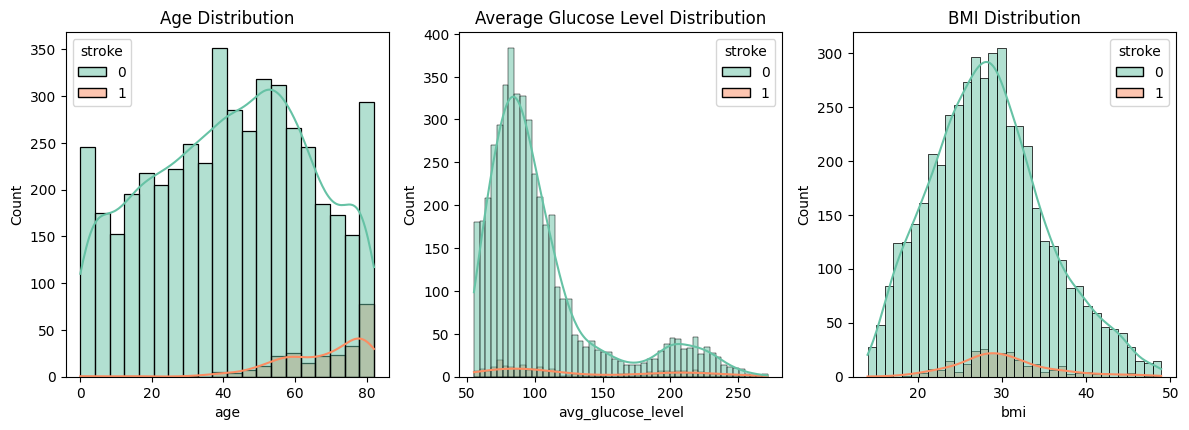

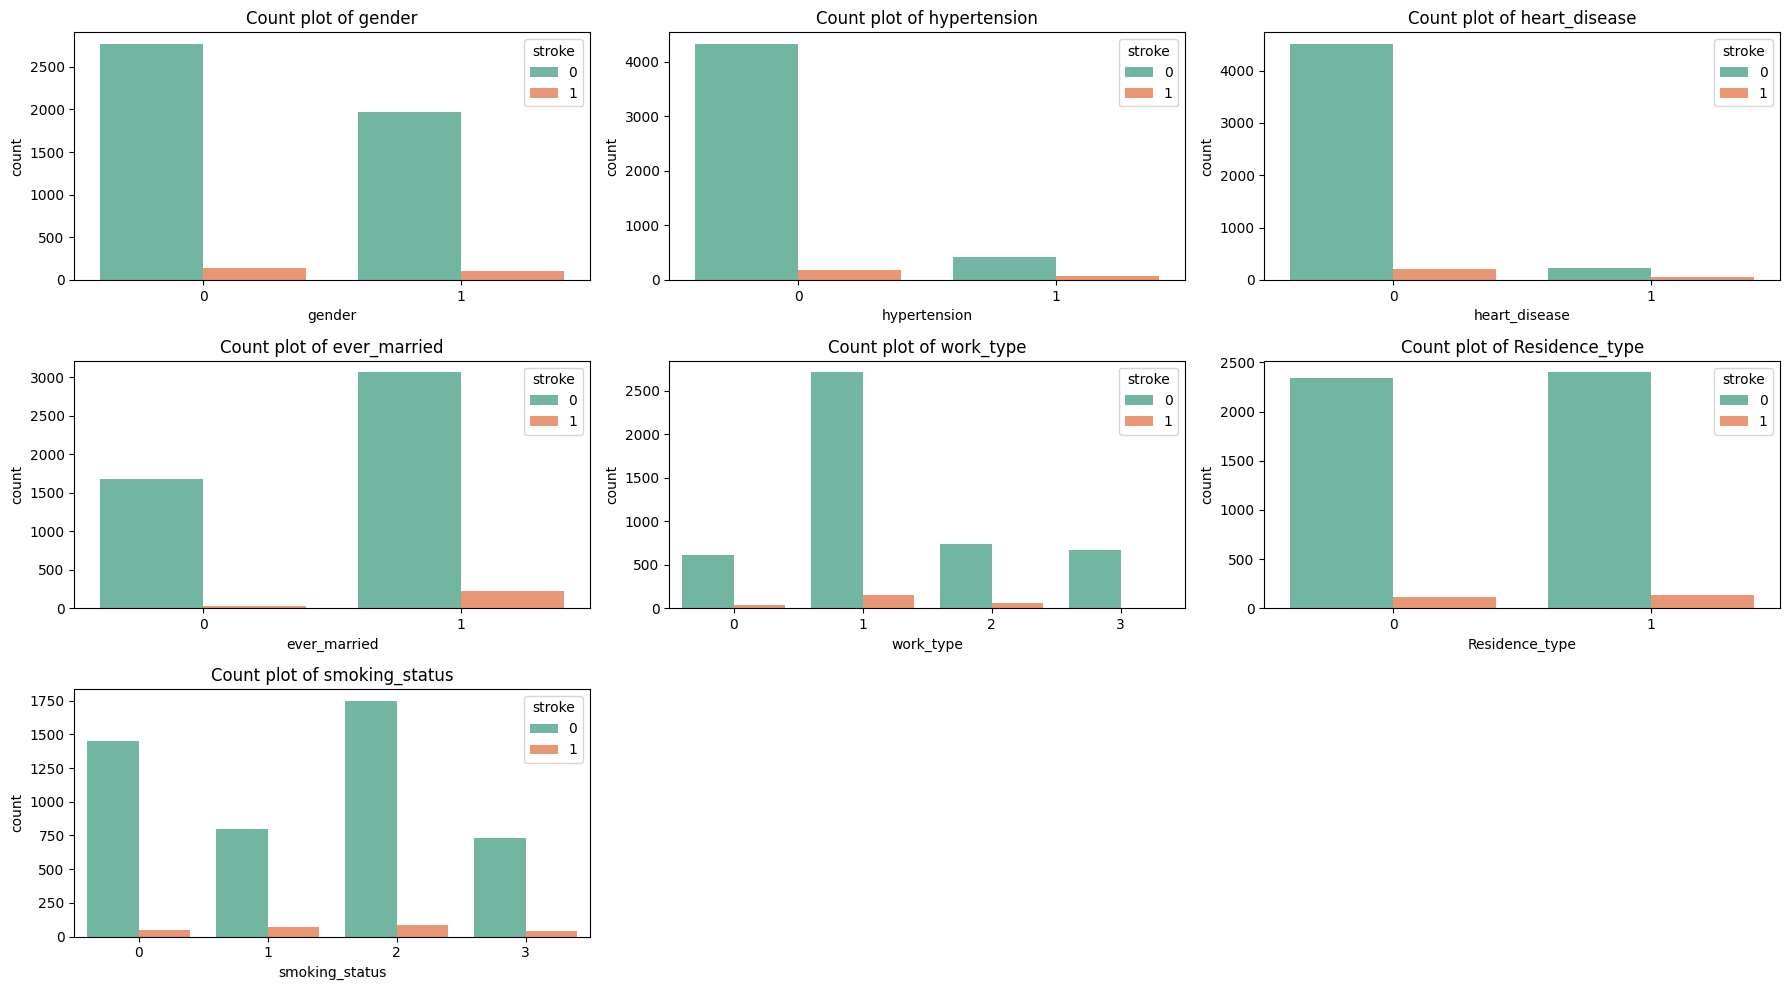

In [38]:
# Create a figure with a size of 12x8 for the plots
plt.figure(figsize=(12, 8))

# Create a subplot (2 rows, 3 columns, position 1)
plt.subplot(2, 3, 1)
# Plot a histogram of 'age' with kernel density estimation (KDE), color-coded by 'stroke' (target variable), using the 'Set2' palette
sns.histplot(data=stroke_data, x='age', hue='stroke', kde=True, palette='Set2', bins=20)
# Set the title of the subplot to 'Age Distribution'
plt.title('Age Distribution')

# Create a subplot (2 rows, 3 columns, position 2)
plt.subplot(2, 3, 2)
# Plot a histogram of 'avg_glucose_level' with KDE, color-coded by 'stroke', using the 'Set2' palette
sns.histplot(data=stroke_data, x='avg_glucose_level', hue='stroke', kde=True, palette='Set2')
# Set the title of the subplot to 'Average Glucose Level Distribution'
plt.title('Average Glucose Level Distribution')

# Create a subplot (2 rows, 3 columns, position 3)
plt.subplot(2, 3, 3)
# Plot a histogram of 'bmi' with KDE, color-coded by 'stroke', using the 'Set2' palette
sns.histplot(data=stroke_data, x='bmi', hue='stroke', kde=True, palette='Set2')
# Set the title of the subplot to 'BMI Distribution'
plt.title('BMI Distribution')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plots
plt.show()

# List of categorical features to plot
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Create a figure with a size of 18x10 for the count plots
plt.figure(figsize=(18, 10))
# Loop through each categorical feature to create a count plot
for i, feature in enumerate(categorical_features):
    # Create a subplot (3 rows, 3 columns, position i+1)
    plt.subplot(3, 3, i+1)
    # Plot a count plot for the feature, color-coded by 'stroke', using the 'Set2' palette
    sns.countplot(x=stroke_data[feature], hue=stroke_data['stroke'], palette='Set2')
    # Set the title of the subplot to 'Count plot of {feature}'
    plt.title(f'Count plot of {feature}')

# Adjust the layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plots
plt.show()


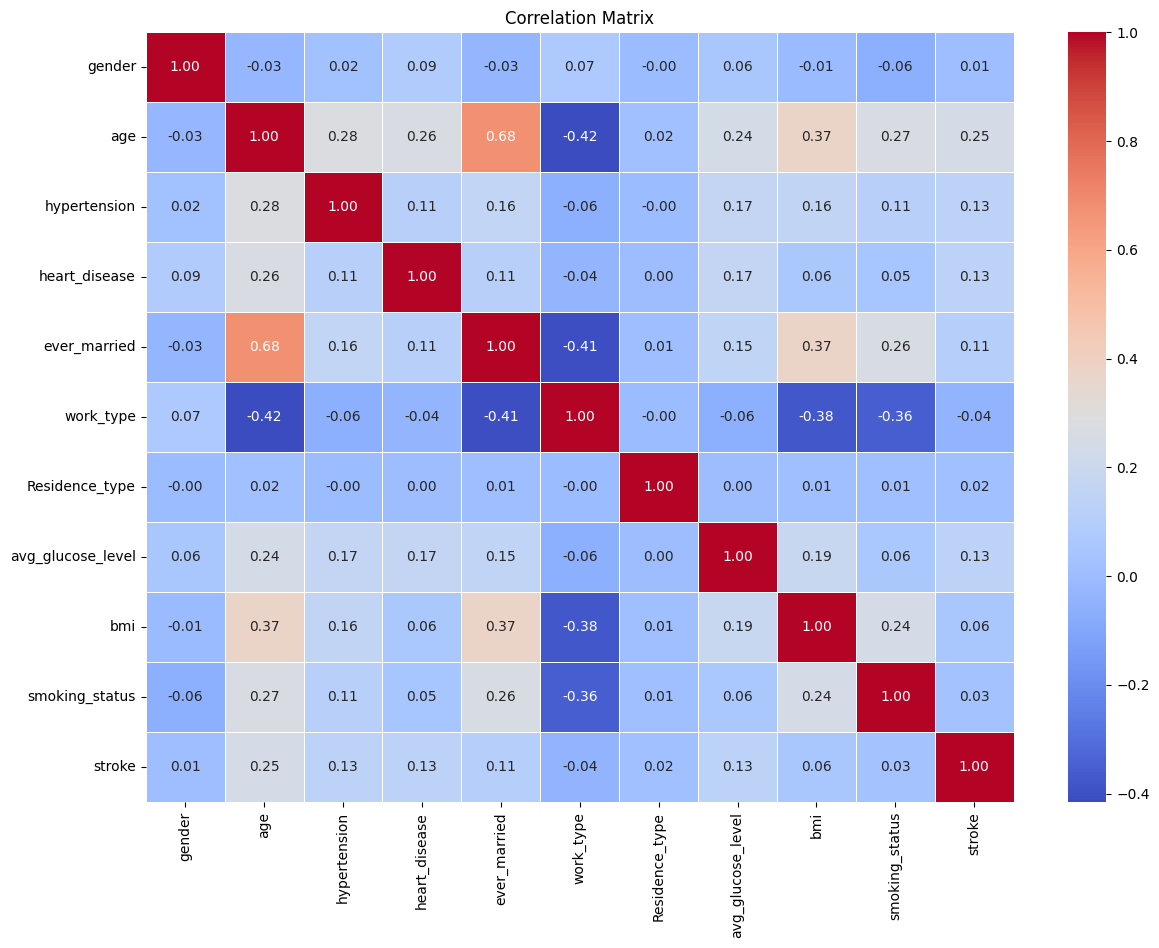

In [39]:
# Compute the correlation matrix for the dataset
correlation_matrix = stroke_data.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(14, 10))  # Create a figure with a specified size (14x10 inches)
sns.heatmap(correlation_matrix,  # Use seaborn's heatmap function to create the heatmap
            annot=True,  # Annotate each cell in the heatmap with the correlation coefficient value
            cmap='coolwarm',  # Use the 'coolwarm' colormap to represent the correlation coefficients
            fmt=".2f",  # Format the annotation text to display with 2 decimal places
            linewidths=0.5)  # Set the width of the lines that will divide each cell
plt.title('Correlation Matrix')  # Set the title of the heatmap
plt.show()  # Display the heatmap


In [40]:
# Separate features and target variable
X = stroke_data.drop('stroke', axis=1)  # Drop the 'stroke' column to create the feature matrix X
y = stroke_data['stroke']  # Assign the 'stroke' column to the target vector y

In [41]:
# Optimize Data
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
X_normalized = scaler.fit_transform(X)

# Convert the result back to a pandas DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Show the normalized data
print(X_normalized_df.head())



   gender       age  hypertension  heart_disease  ever_married  work_type  \
0     1.0  0.816895           0.0            1.0           1.0   0.333333   
1     1.0  0.975586           0.0            1.0           1.0   0.333333   
2     0.0  0.597168           0.0            0.0           1.0   0.333333   
3     0.0  0.963379           1.0            0.0           1.0   0.666667   
4     1.0  0.987793           0.0            0.0           1.0   0.333333   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0             1.0           0.801265  0.647564        0.333333  
1             0.0           0.234512  0.530086        0.666667  
2             1.0           0.536008  0.584527        1.000000  
3             0.0           0.549349  0.286533        0.666667  
4             1.0           0.605161  0.429799        0.333333  


In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized_df, y, test_size=0.2, random_state=42)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Logistic Regression Model**

In [43]:
# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)  # Initialize the Logistic Regression model with a fixed random state for reproducibility

# Train the model
logreg_classifier.fit(X_train_scaled, y_train)  # Fit the Logistic Regression model on the scaled training data

# Make predictions
y_pred = logreg_classifier.predict(X_test_scaled)  # Predict the target variable on the scaled test data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy of the model
class_report = classification_report(y_test, y_pred, zero_division=0)  # Generate a classification report with precision, recall, F1-score, and support

# Print the evaluation results
print("Logistic Regression")
print("Accuracy:", accuracy)  # Print the accuracy
print("Classification Report:\n", class_report)  # Print the classification report


Logistic Regression
Accuracy: 0.9458375125376128
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.95      0.92       997



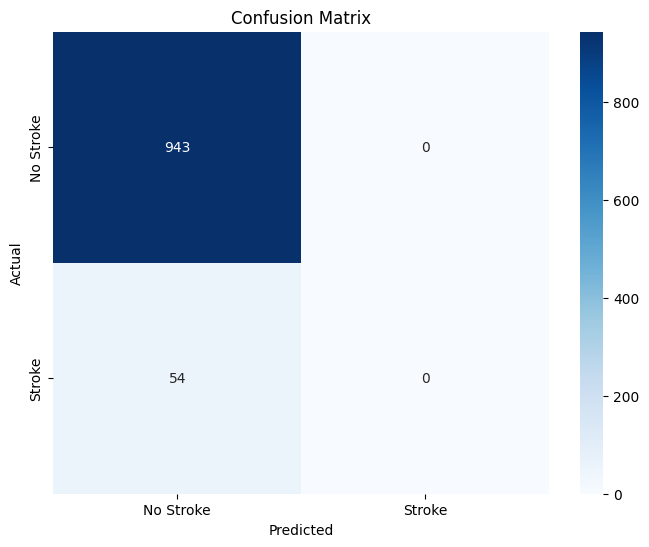

In [44]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


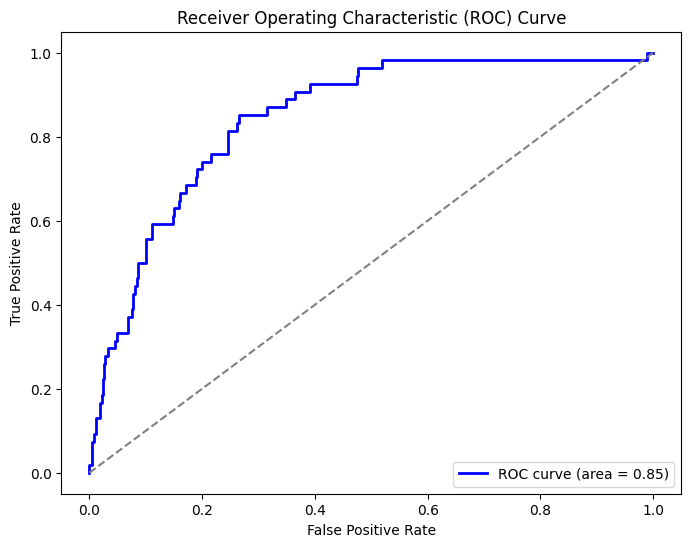

In [45]:

# ROC Curve and AUC
y_pred_prob = logreg_classifier.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


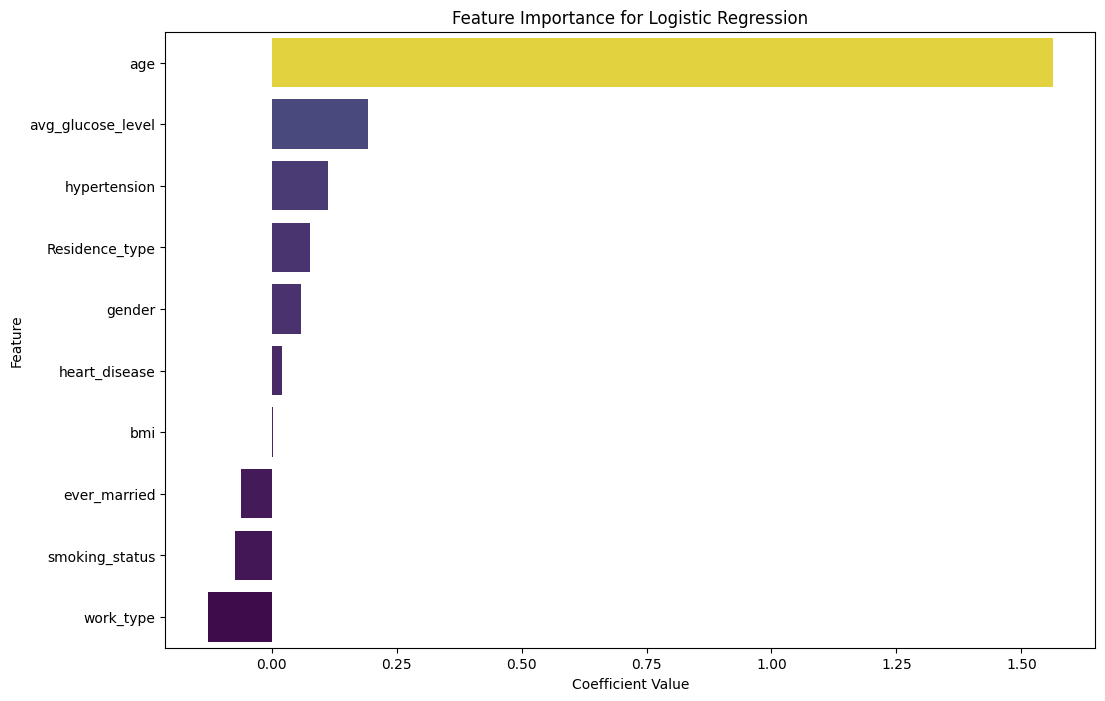

In [46]:


# Feature Importance
feature_importance = logreg_classifier.coef_[0]
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis', hue='Importance', dodge=False, legend=False)
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [47]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Random Forest Classifier")
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Random Forest Classifier
Accuracy: 0.9418254764292878
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



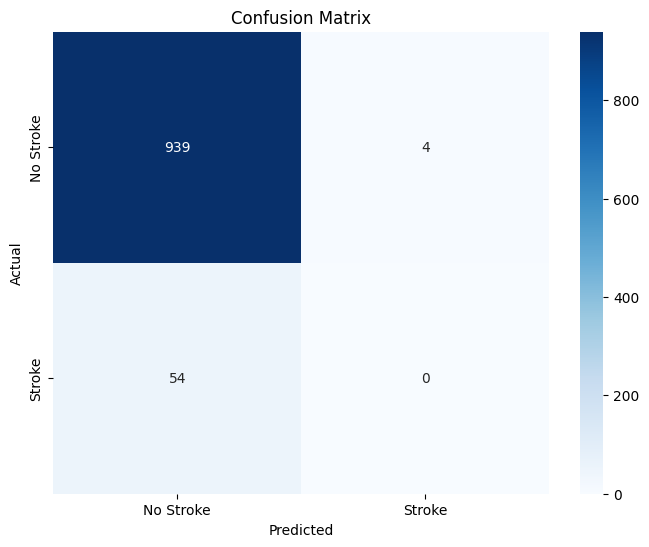

In [48]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

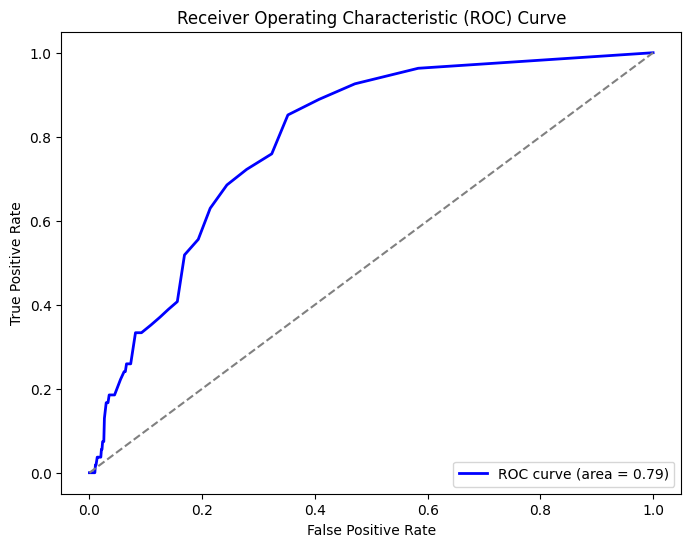

In [49]:

# ROC Curve and AUC
y_pred_prob = rf_classifier.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Feature')

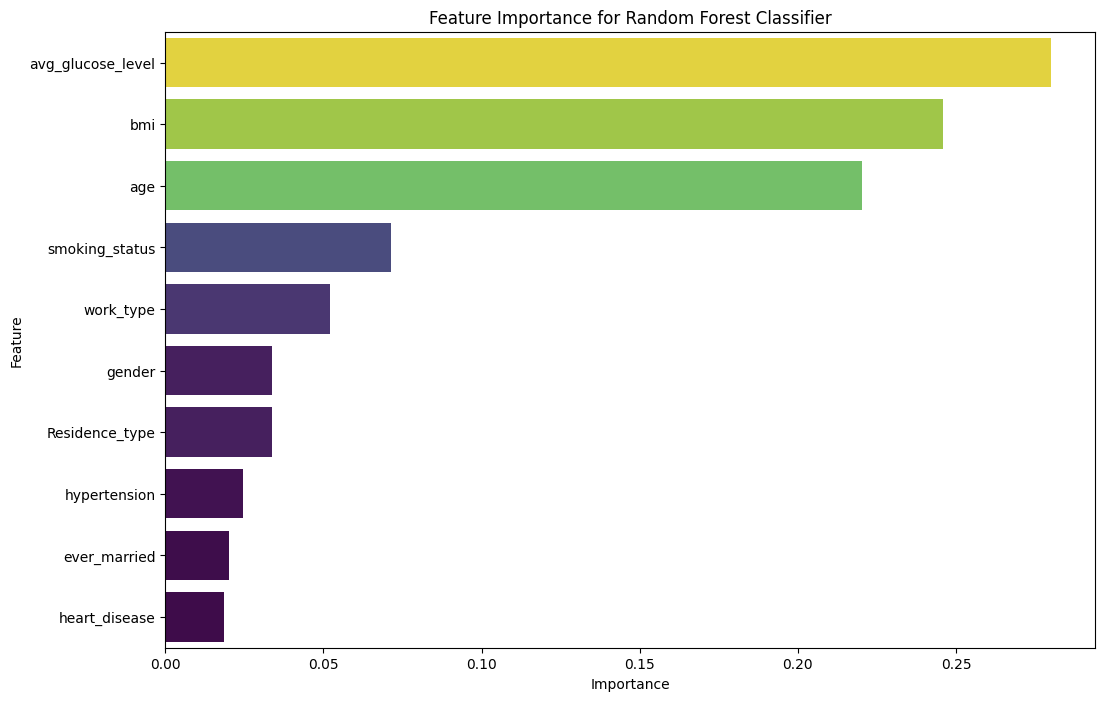

In [50]:
# Feature Importance
feature_importance = rf_classifier.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis', hue='Importance', dodge=False, legend=False)
plt.title('Feature Importance for Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')



In [51]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can tune hyperparameters like max_depth, criterion, etc.

# Train the model
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Decision Tree Classifier")
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)



Decision Tree Classifier
Accuracy: 0.921765295887663
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       943
           1       0.24      0.20      0.22        54

    accuracy                           0.92       997
   macro avg       0.60      0.58      0.59       997
weighted avg       0.92      0.92      0.92       997



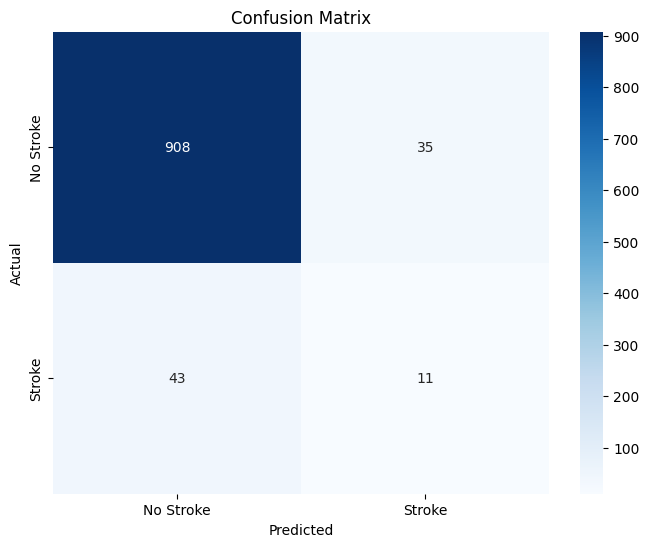

In [52]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

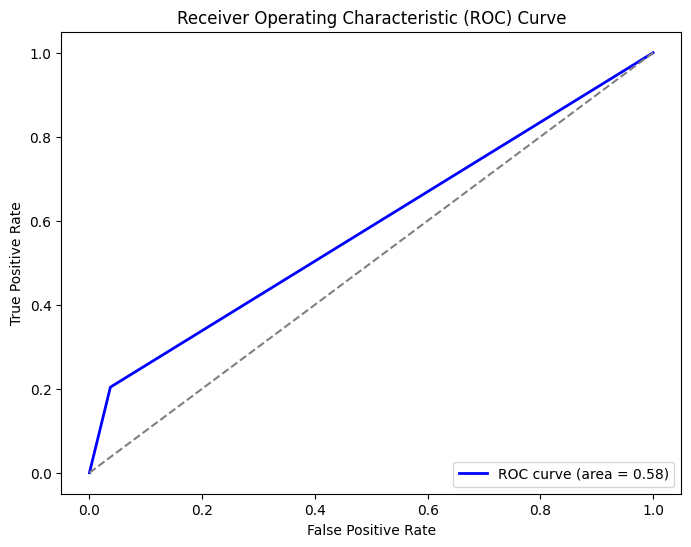

In [53]:
# ROC Curve and AUC
y_pred_prob = dt_classifier.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

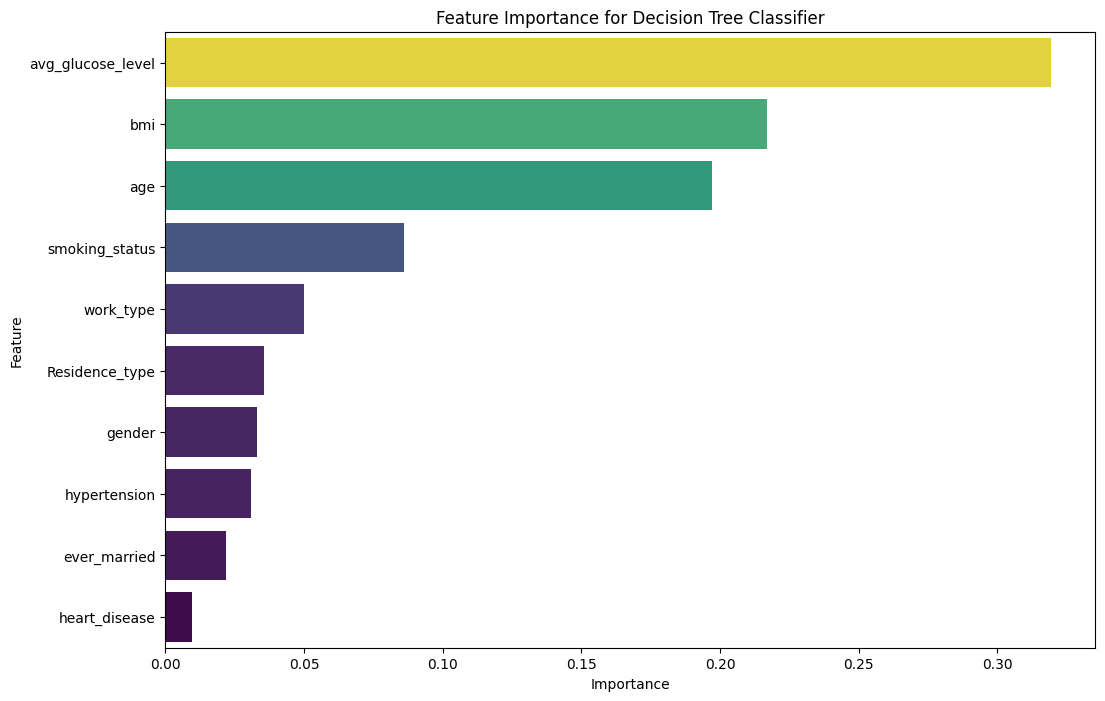

In [54]:
# Feature Importance
feature_importance = dt_classifier.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis', hue='Importance', dodge=False, legend=False)
plt.title('Feature Importance for Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()